In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_drug_data = pd.read_csv(mouse_drug_data_to_load)
clinical_trial_data = pd.read_csv(clinical_trial_data_to_load)

# Combine the data into a single dataset
complete_data = pd.merge(clinical_trial_data, mouse_drug_data, how = "left", on = "Mouse ID")

# Display the data table for preview
complete_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.0,0,Capomulin
1,f932,0,45.0,0,Ketapril
2,g107,0,45.0,0,Ketapril
3,a457,0,45.0,0,Ketapril
4,c819,0,45.0,0,Ketapril


## Tumor Response to Treatment

In [2]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
tumor_vol = complete_data.drop(columns=["Metastatic Sites","Mouse ID"]).groupby(["Drug", "Timepoint"])

# Convert to DataFrame
tumor_vol_mean = tumor_vol.mean().reset_index()

# Preview DataFrame
pd.set_option('display.max_rows', None)
tumor_vol_mean

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325
5,Capomulin,25,39.939528
6,Capomulin,30,38.769339
7,Capomulin,35,37.816839
8,Capomulin,40,36.958001
9,Capomulin,45,36.236114


In [3]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
tumor_vol_sem = complete_data.drop(columns=["Metastatic Sites","Mouse ID"]).groupby(["Drug", "Timepoint"])

# Convert to DataFrame
tumor_vol_sem = tumor_vol.sem().reset_index()

# Preview DataFrame
tumor_vol_sem.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [4]:
# Minor Data Munging to Re-Format the Data Frames
tumor_vol_mean_pivot = tumor_vol_mean.pivot(index = "Timepoint", columns = "Drug")
tumor_vol_sem_pivot = tumor_vol_sem.pivot(index = "Timepoint", columns = "Drug")

# Preview that Reformatting worked
tumor_vol_mean_pivot.head()

Tumor Volume (mm3)                                              \
Drug               Capomulin   Ceftamin  Infubinol   Ketapril   Naftisol   
Timepoint                                                                  
0                  45.000000  45.000000  45.000000  45.000000  45.000000   
5                  44.266086  46.503051  47.062001  47.389175  46.796098   
10                 43.084291  48.285125  49.403909  49.582269  48.694210   
15                 42.064317  50.094055  51.296397  52.399974  50.933018   
20                 40.716325  52.157049  53.197691  54.920935  53.644087   

                                                                  
Drug         Placebo   Propriva   Ramicane   Stelasyn  Zoniferol  
Timepoint                                                         
0          45.000000  45.000000  45.000000  45.000000  45.000000  
5          47.125589  47.248967  43.944859  47.527452  46.851818  
10         49.423329  49.101541  42.531957  49.463844  48.689881  
15         51.359742  51.067318  41.495061  51.529409  50.779059  
20         54.364417  53.346737  40.238325  54.067395  53.170334

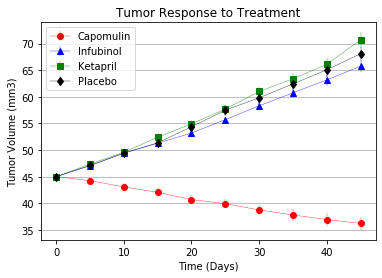

In [5]:
# Generate the Plot (with Error Bars)
plt.errorbar(tumor_vol_mean_pivot.index, tumor_vol_mean_pivot["Tumor Volume (mm3)"]["Capomulin"], color = "red", \
            linewidth = 0.35, marker = "o", label = "Capomulin", yerr = tumor_vol_sem_pivot["Tumor Volume (mm3)"]["Capomulin"])
plt.errorbar(tumor_vol_mean_pivot.index, tumor_vol_mean_pivot["Tumor Volume (mm3)"]["Infubinol"], color = "blue", \
            linewidth = 0.35, marker = "^", label = "Infubinol", yerr = tumor_vol_sem_pivot["Tumor Volume (mm3)"]["Infubinol"])
plt.errorbar(tumor_vol_mean_pivot.index, tumor_vol_mean_pivot["Tumor Volume (mm3)"]["Ketapril"], color = "green", \
            linewidth = 0.35, marker = "s", label = "Ketapril", yerr = tumor_vol_sem_pivot["Tumor Volume (mm3)"]["Ketapril"])
plt.errorbar(tumor_vol_mean_pivot.index, tumor_vol_mean_pivot["Tumor Volume (mm3)"]["Placebo"], color = "black", \
            linewidth = 0.35, marker = "d", label = "Placebo", yerr = tumor_vol_sem_pivot["Tumor Volume (mm3)"]["Placebo"])
plt.title("Tumor Response to Treatment")
plt.ylabel("Tumor Volume (mm3)")
plt.xlabel("Time (Days)")
plt.grid(axis = "y")
plt.legend()

# Save the Figure
plt.savefig("treatment.png")

# Show the Figure
plt.show()

## Metastatic Response to Treatment

In [6]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
tumor_met = complete_data.drop(columns=["Mouse ID","Tumor Volume (mm3)"]).groupby(["Drug", "Timepoint"])

# Convert to DataFrame
tumor_met_mean = tumor_met.mean()

# Preview DataFrame
tumor_met_mean.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174

In [7]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
tumor_met_sem = complete_data.drop(columns=["Mouse ID", "Tumor Volume (mm3)"]).groupby(["Drug", "Timepoint"])

# Convert to DataFrame
tumor_met_sem = tumor_met_sem.sem()

# Preview DataFrame
tumor_met_sem.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621

In [8]:
# Minor Data Munging to Re-Format the Data Frames
tumor_met_mean= tumor_met.mean().reset_index()
tumor_met_mean_pivot = tumor_met_mean.pivot(index = "Timepoint", columns = "Drug")
tumor_met_sem= tumor_met.sem().reset_index()
tumor_met_sem_pivot = tumor_met_sem.pivot(index = "Timepoint", columns = "Drug")

# Preview that Reformatting worked
tumor_met_mean_pivot.head()

Metastatic Sites                                                    \
Drug             Capomulin  Ceftamin Infubinol  Ketapril  Naftisol   Placebo   
Timepoint                                                                      
0                 0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
5                 0.160000  0.380952  0.280000  0.304348  0.260870  0.375000   
10                0.320000  0.600000  0.666667  0.590909  0.523810  0.833333   
15                0.375000  0.789474  0.904762  0.842105  0.857143  1.250000   
20                0.652174  1.111111  1.050000  1.210526  1.150000  1.526316   

                                                   
Drug       Propriva  Ramicane  Stelasyn Zoniferol  
Timepoint                                          
0          0.000000  0.000000  0.000000  0.000000  
5          0.320000  0.120000  0.240000  0.166667  
10         0.565217  0.250000  0.478261  0.500000  
15         0.764706  0.333333  0.782609  0.809524  
20         1.000000  0.347826  0.952381  1.294118

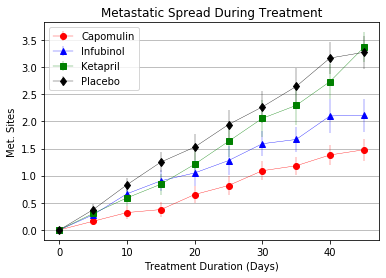

In [9]:
# Generate the Plot (with Error Bars)
plt.errorbar(tumor_met_mean_pivot.index, tumor_met_mean_pivot["Metastatic Sites"]["Capomulin"], color = "red", \
            linewidth = 0.35, marker = "o", label = "Capomulin", yerr = tumor_met_sem_pivot["Metastatic Sites"]["Capomulin"])
plt.errorbar(tumor_met_mean_pivot.index, tumor_met_mean_pivot["Metastatic Sites"]["Infubinol"], color = "blue", \
            linewidth = 0.35, marker = "^", label = "Infubinol", yerr = tumor_met_sem_pivot["Metastatic Sites"]["Infubinol"])
plt.errorbar(tumor_met_mean_pivot.index, tumor_met_mean_pivot["Metastatic Sites"]["Ketapril"], color = "green", \
            linewidth = 0.35, marker = "s", label = "Ketapril", yerr = tumor_met_sem_pivot["Metastatic Sites"]["Ketapril"])
plt.errorbar(tumor_met_mean_pivot.index, tumor_met_mean_pivot["Metastatic Sites"]["Placebo"], color = "black", \
            linewidth = 0.35, marker = "d", label = "Placebo", yerr = tumor_met_sem_pivot["Metastatic Sites"]["Placebo"])
plt.title("Metastatic Spread During Treatment")
plt.ylabel("Met. Sites")
plt.xlabel("Treatment Duration (Days)")
plt.grid(axis = "y")
plt.legend()

# Save the Figure
plt.savefig("spread.png")

# Show the Figure
plt.show()

![Metastatic Spread During Treatment](../Images/spread.png)

## Survival Rates

In [10]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
tumor_mice = complete_data.drop(columns=["Metastatic Sites","Tumor Volume (mm3)"]).groupby(["Drug", "Timepoint"])

# Convert to DataFrame
tumor_mice_count = tumor_mice.count().reset_index()

# Preview DataFrame
tumor_mice_count.head()

,Drug,Timepoint,Mouse ID
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [11]:
# Minor Data Munging to Re-Format the Data Frames
tumor_mice_pivot = tumor_mice_count.pivot(index = "Timepoint", columns = "Drug")

# Preview the Data Frame
tumor_mice_pivot.head()


Mouse ID                                                        \
Drug      Capomulin Ceftamin Infubinol Ketapril Naftisol Placebo Propriva   
Timepoint                                                                   
0                25       25        25       25       25      25       26   
5                25       21        25       23       23      24       25   
10               25       20        21       22       21      24       23   
15               24       19        21       19       21      20       17   
20               23       18        20       19       20      19       17   

                                       
Drug      Ramicane Stelasyn Zoniferol  
Timepoint                              
0               25       26        25  
5               25       25        24  
10              24       23        22  
15              24       23        21  
20              23       21        17

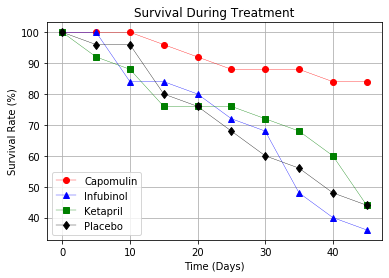

In [12]:
# Generate the Plot (Accounting for percentages)
plt.plot(tumor_mice_pivot.index, tumor_mice_pivot["Mouse ID"]["Capomulin"]/25*100, color = "red", \
            linewidth = 0.35, marker = "o", label = "Capomulin")
plt.plot(tumor_mice_pivot.index, tumor_mice_pivot["Mouse ID"]["Infubinol"]/25*100, color = "blue", \
            linewidth = 0.35, marker = "^", label = "Infubinol")
plt.plot(tumor_mice_pivot.index, tumor_mice_pivot["Mouse ID"]["Ketapril"]/25*100, color = "green", \
            linewidth = 0.35, marker = "s", label = "Ketapril")
plt.plot(tumor_mice_pivot.index, tumor_mice_pivot["Mouse ID"]["Placebo"]/25*100, color = "black", \
            linewidth = 0.35, marker = "d", label = "Placebo")
plt.title("Survival During Treatment")
plt.ylabel("Survival Rate (%)")
plt.xlabel("Time (Days)")
plt.grid(axis = "both")
plt.legend()

# Save the Figure
plt.savefig("survival.png")

# Show the Figure
plt.show()

![Metastatic Spread During Treatment](../Images/survival.png)

## Summary Bar Graph

In [13]:
# Calculate the percent changes for each drug
tumor_mean_perc = 100 * (tumor_vol_mean_pivot.iloc[-1] - tumor_vol_mean_pivot.iloc[0])/tumor_vol_mean_pivot.iloc[0]
tumor_sem_perc = 100 * (tumor_vol_sem_pivot.iloc[-1] - tumor_vol_sem_pivot.iloc[0])/tumor_vol_sem_pivot.iloc[0]

# Display the data to confirm
tumor_mean_perc

                    Drug     
Tumor Volume (mm3)  Capomulin   -19.475303
                    Ceftamin     42.516492
                    Infubinol    46.123472
                    Ketapril     57.028795
                    Naftisol     53.923347
                    Placebo      51.297960
                    Propriva     47.241175
                    Ramicane    -22.320900
                    Stelasyn     52.085134
                    Zoniferol    46.579751
dtype: float64

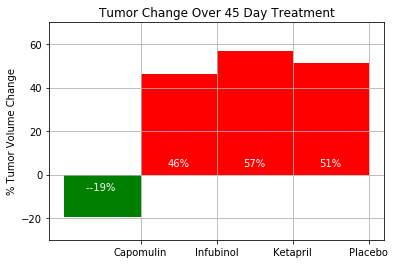

In [14]:
# Store all Relevant Percent Changes into a Tuple
pct_changes = (tumor_mean_perc["Tumor Volume (mm3)"]["Capomulin"], 
               tumor_mean_perc["Tumor Volume (mm3)"]["Infubinol"], 
               tumor_mean_perc["Tumor Volume (mm3)"]["Ketapril"], 
               tumor_mean_perc["Tumor Volume (mm3)"]["Placebo"])

# Splice the data between passing and failing drugs
fig, ax = plt.subplots()
ind = np.arange(len(pct_changes))  
width = 1
rectsPass = ax.bar(ind[0], pct_changes[0], width, color='green')
rectsFail = ax.bar(ind[1:], pct_changes[1:], width, color='red')


# Orient widths. Add labels, tick marks, etc. 
ax.set_ylabel('% Tumor Volume Change')
ax.set_title('Tumor Change Over 45 Day Treatment')
ax.set_xticks(ind + 0.5)
ax.set_xticklabels(('Capomulin', 'Infubinol', 'Ketapril', 'Placebo'))
ax.set_autoscaley_on(False)
ax.set_ylim([-30,70])
ax.grid(True)

# Use functions to label the percentages of changes
def autolabelFail(rects):
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 3,
                '%d%%' % int(height),
                ha='center', va='bottom', color="white")

def autolabelPass(rects):
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., -8,
                '-%d%% ' % int(height),
                ha='center', va='bottom', color="white")


# Call functions to implement the function calls
autolabelPass(rectsPass)
autolabelFail(rectsFail)

# Save the Figure
plt.savefig("change.png")


# Show the Figure
fig.show()

![Metastatic Spread During Treatment](../Images/change.png)

In [15]:
# Obsevable Trends:
# 1. The mice who are given Capomulin have a higher survival rate than those who take Infubinol, Ketapril, and Placebo
# 2. Placebo results in the greatest metastatic spread, however after 40 days it shows that the mice who take Ketapril 
#    surpass those given Placebo in their metastatic spread
# 3. While the tumor volume decreases in response to Capomulin treatment, for the other drugs 
#    (Infubinol, Ketapril, and Placebo) the tumor responds by increasing over time at fairly similar rates